In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("players_22.csv")

In [4]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [6]:
players = players.dropna(subset=features)

In [7]:
data = players[features].copy()

In [11]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
4302,71,71,6000.0,1900000.0,21
4303,71,71,19000.0,2100000.0,25
4304,71,71,20000.0,1800000.0,29
4305,71,71,8000.0,2200000.0,21


In [12]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1

In [13]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,4281.000000,4281.000000,4281.000000,4281.000000,4281.000000
mean,2.821473,3.494550,1.813809,1.478623,5.141286
std,1.633765,1.916587,0.963718,0.731377,1.554089
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.454545,1.833333,1.300429,1.113009,4.076923
50%,2.363636,3.083333,1.529328,1.226534,5.230769
75%,3.727273,4.750000,1.958512,1.505186,6.384615
max,11.000000,11.000000,11.000000,11.000000,11.000000


In [14]:
data.head()


,overall,potential,wage_eur,value_eur,age
0,11.000000,10.166667,10.141631,5.014139,7.538462
1,10.545455,9.750000,8.711016,7.155632,6.769231
2,10.090909,9.333333,8.711016,3.311265,8.307692
3,10.090909,9.333333,8.711016,7.645854,5.615385
4,10.090909,9.333333,11.000000,7.465246,6.000000


In [15]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [16]:
centroids = random_centroids(data, 5)

<ipython-input-15-3d018814f2ee>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [17]:
centroids


,0,1,2,3,4
overall,1.454545,1.000000,3.272727,1.000000,2.818182
potential,3.083333,3.916667,3.916667,2.666667,1.416667
wage_eur,1.243205,1.014306,1.815451,1.500715,1.701001
value_eur,1.247175,1.242015,1.071727,2.692038,1.154291
age,6.384615,4.076923,4.076923,4.461538,3.692308


In [18]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [19]:
labels = get_labels(data, centroids)

In [20]:
labels.value_counts()

,count
2,1733
0,1617
1,505
4,335
3,91


In [21]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [23]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

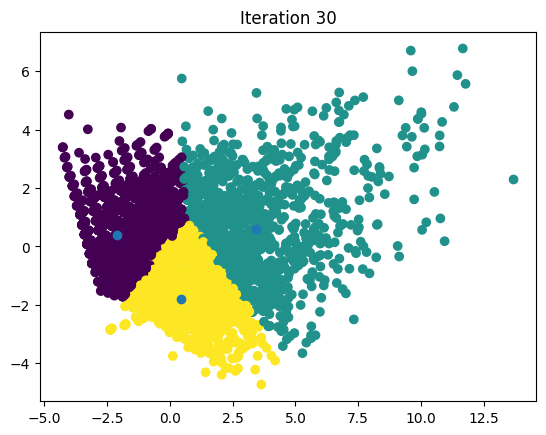

In [24]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1